# Group Members | 3IIR-G3
- Hassan AIT MOUSSA
- Soufiane ABOUALAM
- Yasser BENHADDA
- Mohamed Amine ELIDRISSI

This Jupyter Notebook demonstrates Exploratory Data Analysis (EDA) on a Disney dataset using `Pandas` and `Seaborn` libraries. We'll explore the data step-by-step, explaining each code cell.

## Import Libraries

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_theme(style='whitegrid')

# Ensure inline plotting in Jupyter Notebook
%matplotlib inline

- We import the necessary libraries:
    - `pandas (pd)` for data manipulation and analysis.
    - `seaborn (sns)` for creating informative visualizations.
    - `matplotlib.pyplot (plt)` for basic plotting functionalities used by Seaborn.

## Load the Dataset

In [35]:
df = pd.read_csv('disney.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


- Load Data: We use `pd.read_csv` to read the CSV file containing the Disney data.
- Peek at the Data: We call `data.head()` to display the first few rows of the dataset.

# Top 5 Best Listed Categories Analysis

In this section, we will identify the top 5 best listed categories in the Disney dataset based on the number of entries.

## Check the Data for `listed_in` Column
Verify if the `listed_in` column contains any data.

In [41]:
df['listed_in'].unique()

array(['Animation, Family', 'Comedy', 'Animation, Comedy, Family',
       'Musical', 'Docuseries, Historical, Music',
       'Biographical, Documentary', 'Action-Adventure, Superhero',
       'Docuseries, Reality, Survival',
       'Animals & Nature, Docuseries, Family', 'Comedy, Family, Musical',
       'Documentary', 'Comedy, Family, Music', 'Documentary, Family',
       'Action-Adventure, Animals & Nature, Docuseries',
       'Animals & Nature', 'Animation', 'Animation, Kids',
       'Comedy, Coming of Age, Drama', 'Comedy, Family, Fantasy',
       'Animation, Comedy, Drama', 'Animation, Family, Fantasy',
       'Action-Adventure, Animation, Comedy', 'Comedy, Family',
       'Action-Adventure, Comedy, Family', 'Lifestyle', 'Movies',
       'Action-Adventure, Science Fiction',
       'Action-Adventure, Fantasy, Superhero', 'Coming of Age, Music',
       'Animation, Drama', 'Concert Film, Music',
       'Animation, Comedy, Coming of Age', 'Animation, Comedy',
       'Animation, Crime,

## Check for Missing or `NaN` Values
Ensure there are no missing or `NaN` values in the `listed_in` column.

In [42]:
df['listed_in'].isnull().sum()

0

## Calculate the Metric
Group by the `listed_in` column and count the number of entries for each category.

In [45]:
# Split the 'listed_in' column by ',' and explode the DataFrame to get one category per row
df_exploded = df.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')

# Trim any whitespace from category names
df_exploded['listed_in'] = df_exploded['listed_in'].str.strip()

# Calculate the number of entries for each listed category
category_counts = df_exploded['listed_in'].value_counts()

top_5_categories = category_counts.head(5)

## Visualize the Top 5 Listed Categories
We will now visualize the top 5 listed categories using a bar chart.

Text(0, 0.5, 'Category')

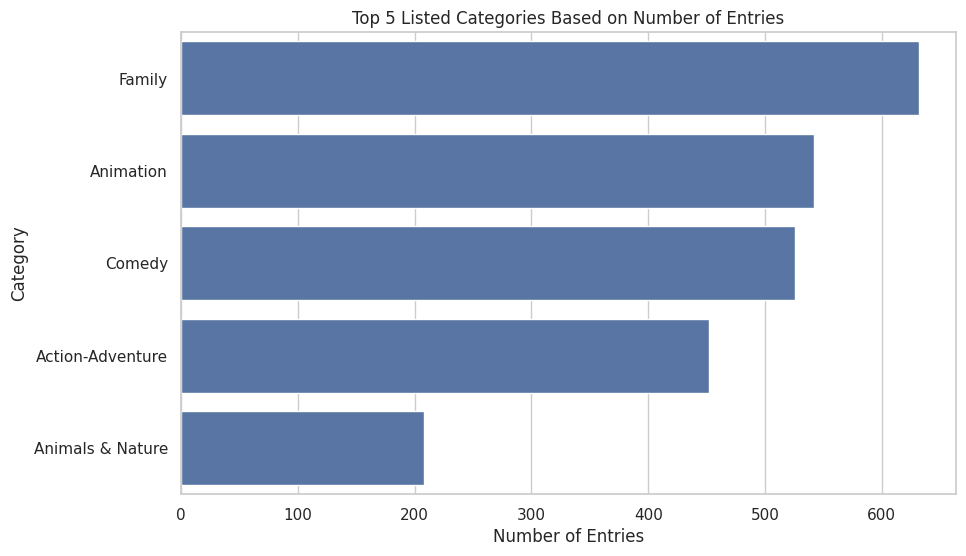

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_categories.values, y=top_5_categories.index)
plt.title('Top 5 Listed Categories Based on Number of Entries')
plt.xlabel('Number of Entries')
plt.ylabel('Category')


# Top 5 Directors Analysis

In this section, we will identify the top 5 directors in the Disney dataset based on the number of entries.

## Check the Data for `director` Column
Verify if the `director` column contains any data.

In [49]:
df['director'].unique()

array(['Alonso Ramirez Ramos, Dave Wasson', 'John Cherry', 'Karen Disher',
       'Hamish Hamilton', nan, 'Liz Garbus', 'Kirk R. Thatcher',
       'John Gleim', 'Leslie Iwerks', 'McKenna Harris', 'Kevin Lima',
       'Patrick Osborne', 'Chris Buck, Jennifer Lee', 'Lauren MacMullan',
       'Dan Mazer', 'Jaume Collet-Serra', 'John Kahrs',
       'Destin Daniel Cretton', 'Manjari Makijany',
       'Nathan Greno, Byron Howard',
       'Stevie Wermers-Skelton, Kevin Deters', 'Roger Allers',
       'David Clair', 'David Silverman', 'Dean Wellins', 'Mike Mitchell',
       'Brian Levant', 'Alex Zamm',
       'Kevin Deters, Stevie Wermers-Skelton', 'Robert Vince',
       'Matthew Vaughn', 'Niki Caro', 'Daniel Stern',
       'Don Bluth, Gary Goldman', 'Jim Greayer', 'Ben Crichton',
       'Jeff Gordon', 'Kirk Thatcher', 'Dave Hoffman', 'Cate Shortland',
       'John Hoffman, Janet Tobias', 'Tim Hill', 'Walt Becker',
       'Ken Cunningham', 'Robert Stromberg',
       'Alonso Ramirez Ramos, Eddi

## Check for Missing or `NaN` Values
Ensure there are no missing or `NaN `values in the `director` column.

In [50]:
df['director'].isnull().sum()

473

## Calculate the Metric
Group by the `director` column and count the number of entries for each director.

In [52]:
# Handle rows with multiple directors by splitting and exploding the DataFrame
df_exploded_directors = df.assign(director=df['director'].str.split(',')).explode('director')

# Trim any whitespace from director names
df_exploded_directors['director'] = df_exploded_directors['director'].str.strip()

# Calculate the number of entries for each director
director_counts = df_exploded_directors['director'].value_counts()

top_5_directors = director_counts.head(5)

## Visualize the Top 5 Directors
We will now visualize the top 5 directors using a bar chart.

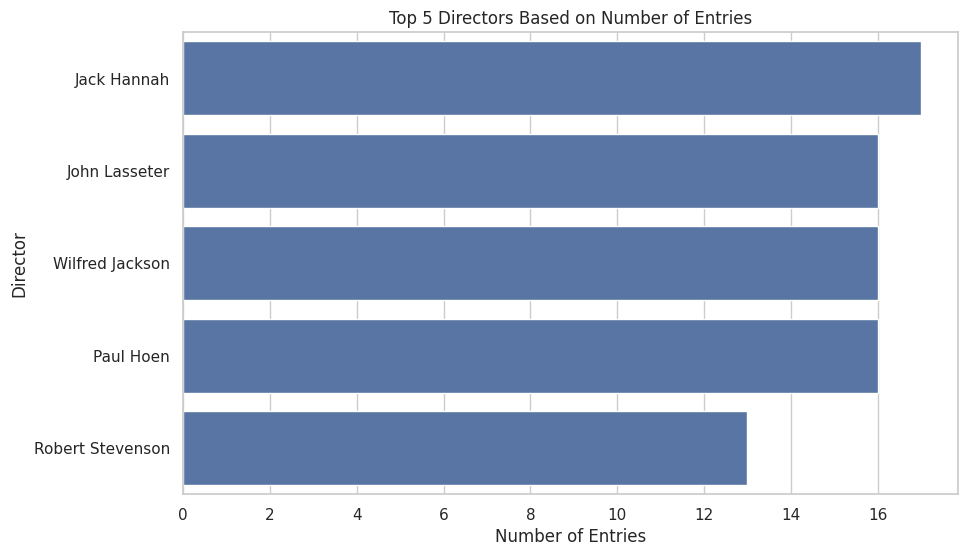

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_directors.values, y=top_5_directors.index)
plt.title('Top 5 Directors Based on Number of Entries')
plt.xlabel('Number of Entries')
plt.ylabel('Director')
plt.show()

# Top 10 Best Actors Analysis

In this section, we will identify the top 10 best actors in the Disney dataset based on the number of entries.

## Check the Data for 'cast' Column

Verify if the `cast` column contains any data.

In [61]:
df['cast'].unique()

array(['Chris Diamantopoulos, Tony Anselmo, Tress MacNeille, Bill Farmer, Russi Taylor, Corey Burton',
       'Jim Varney, Noelle Parker, Douglas Seale',
       'Raymond Albert Romano, John Leguizamo, Denis Leary, Queen Latifah',
       ...,
       'Tom Costello, Jo Hartley, Keith Allen, Dickon Tolson, Jack Costello, Taron Egerton',
       'Parminder Nagra, Keira Knightley, Jonathan Rhys-Meyers, Anupam Kher, Archie Panjabi, Shaznay Lewis',
       'Charlie Tahan'], dtype=object)

## Check for Missing or `NaN` Values
Ensure there are no missing or `NaN` values in the `cast` column.

In [62]:
df['cast'].isnull().sum()

190

## Calculate the Metric
Group by the `cast` column and count the number of entries for each actor.

In [64]:
df_exploded_cast = df.assign(cast=df['cast'].str.split(',')).explode('cast')
df_exploded_cast['cast'] = df_exploded_cast['cast'].str.strip()
actor_counts = df_exploded_cast['cast'].value_counts()
top_10_actors = actor_counts.head(10)

## Visualize the Top 10 Actors
We will now visualize the **top 10** actors using a **donut chart**.

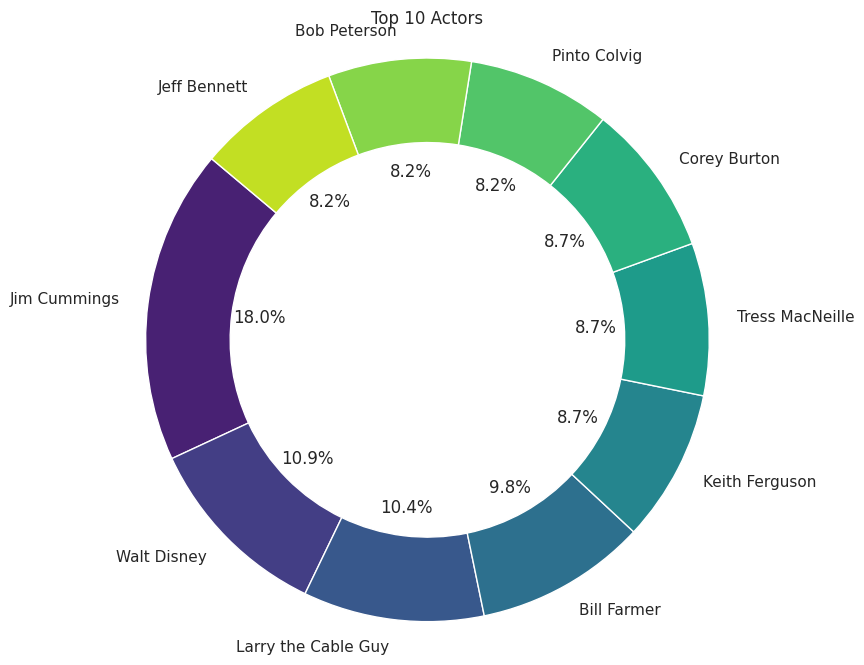

In [67]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_actors.values, labels=top_10_actors.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_10_actors)), wedgeprops=dict(width=0.3))
plt.title('Top 10 Actors')
plt.axis('equal')
plt.show()


# Top 5 Best TV Series Analysis

In this section, we will identify the **top 5 TV series** in the **Disney** dataset based on the number of entries.

## Filter for TV Series
Filter the dataset to include only **TV series**.


In [76]:
tv_shows = df[df['type'] == 'TV Show']

# Display the filtered dataset
tv_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
13,s14,TV Show,"Dr. Oakley, Yukon Vet",NaN,"Dr. Michelle Oakley, Zachary Fine",United States,"November 17, 2021",2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1417,s1418,TV Show,X-Men: Evolution,NaN,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,"November 12, 2019",2000,TV-Y7,4 Seasons,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
1434,s1435,TV Show,Smart Guy,NaN,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,"October 1, 2019",1996,TV-G,3 Seasons,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
1439,s1440,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


## Calculate the Metric
Count the number of entries for each TV series.

In [79]:
# Count the number of entries for each TV series
tv_show_counts = tv_shows['title'].value_counts()

top_5_tv_shows = tv_show_counts.head(5)

## Visualize the Top 5 TV Shows
We will now visualize the top 5 TV shows using an enhanced horizontal bar plot.

/tmp/ipykernel_11438/279427205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_tv_shows.values, y=top_5_tv_shows.index, palette='viridis')


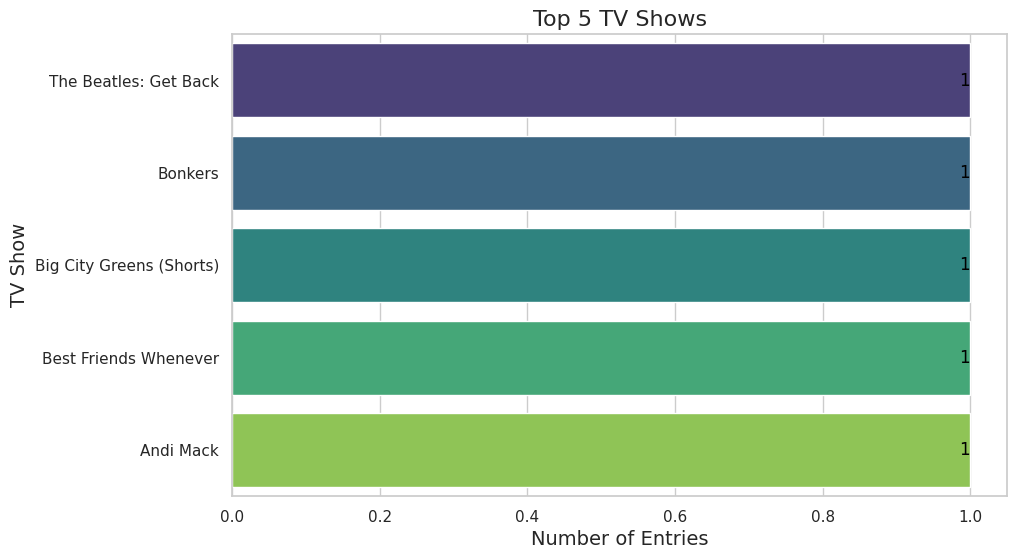

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_tv_shows.values, y=top_5_tv_shows.index, palette='viridis')
plt.title('Top 5 TV Shows', fontsize=16)
plt.xlabel('Number of Entries', fontsize=14)
plt.ylabel('TV Show', fontsize=14)

# Add value labels to the bars
for index, value in enumerate(top_5_tv_shows.values):
    plt.text(value, index, str(value), va='center', ha='right', fontsize=12, color='black')

plt.show()

# Identify Similar Content by Matching Text Features

In this section, we will identify similar content in the Disney dataset by matching text features using TF-IDF and cosine similarity.

In [84]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Set display options
pd.set_option('display.max_colwidth', 200)

## Prepare the Text Data
Combine relevant text features (e.g., title, description) to create a single text field.

In [93]:
df['text'] = df['title'] + " " + df['description']
df[['show_id', 'text']].head()

,show_id,text
0,s1,Duck the Halls: A Mickey Mouse Christmas Special Join Mickey and the gang as they duck the halls!
1,s2,Ernest Saves Christmas Santa Claus passes his magic bag to a new St. Nic.
2,s3,Ice Age: A Mammoth Christmas Sid the Sloth is on Santa's naughty list.
3,s4,"The Queen Family Singalong This is real life, not just fantasy!"
4,s5,The Beatles: Get Back A three-part documentary from Peter Jackson capturing a moment in music history with The Beatles.


## Convert Text to Numerical Features
Use TF-IDF to convert the text data into numerical features.

In [87]:
# Initialize the F-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

tfidf_matrix.shape

(1450, 4859)

## Calculate Similarity
Use cosine similarity to find similar content.

In [94]:
# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.04301765, 0.04635535, ..., 0.        , 0.        ,
        0.        ],
       [0.04301765, 1.        , 0.12351188, ..., 0.        , 0.        ,
        0.        ],
       [0.04635535, 0.12351188, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

## Display Similar Content
Show the top similar items for a given piece of content.

In [96]:
# Function to get the top N similar items for a given item index
def get_similar_items(index, top_n=5):
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Exclude the first item (itself)
    item_indices = [i[0] for i in sim_scores]
    return df.iloc[item_indices]

# Get similar items for the first TV show
similar_items = get_similar_items(2)
similar_items[['title', 'description']]

,title,description
151,Ice Age: The Meltdown,"Manny, Sid, Diego and Scrat join forces with new friends to save the valley from an epic flood."
958,Ice Age: The Great Egg-Scapade,Our favorite Ice Age herd embarks on a rescue mission that turns into the world’s first egg hunt.
1177,Santa Paws 2: The Santa Pups,"When holiday spirit mysteriously begins to disappear, the Santa Pups race to save Christmas."
1178,Santa's Workshop,Santa and his elves make toys to deliver on Christmas Eve See details for advisory.
1331,The Santa Clause 2,Scott Calvin must get married by Christmas Eve or lose his title as Santa.


## Visualize Similarity with a Heatmap
We will now visualize the similarity matrix using a **heatmap**.

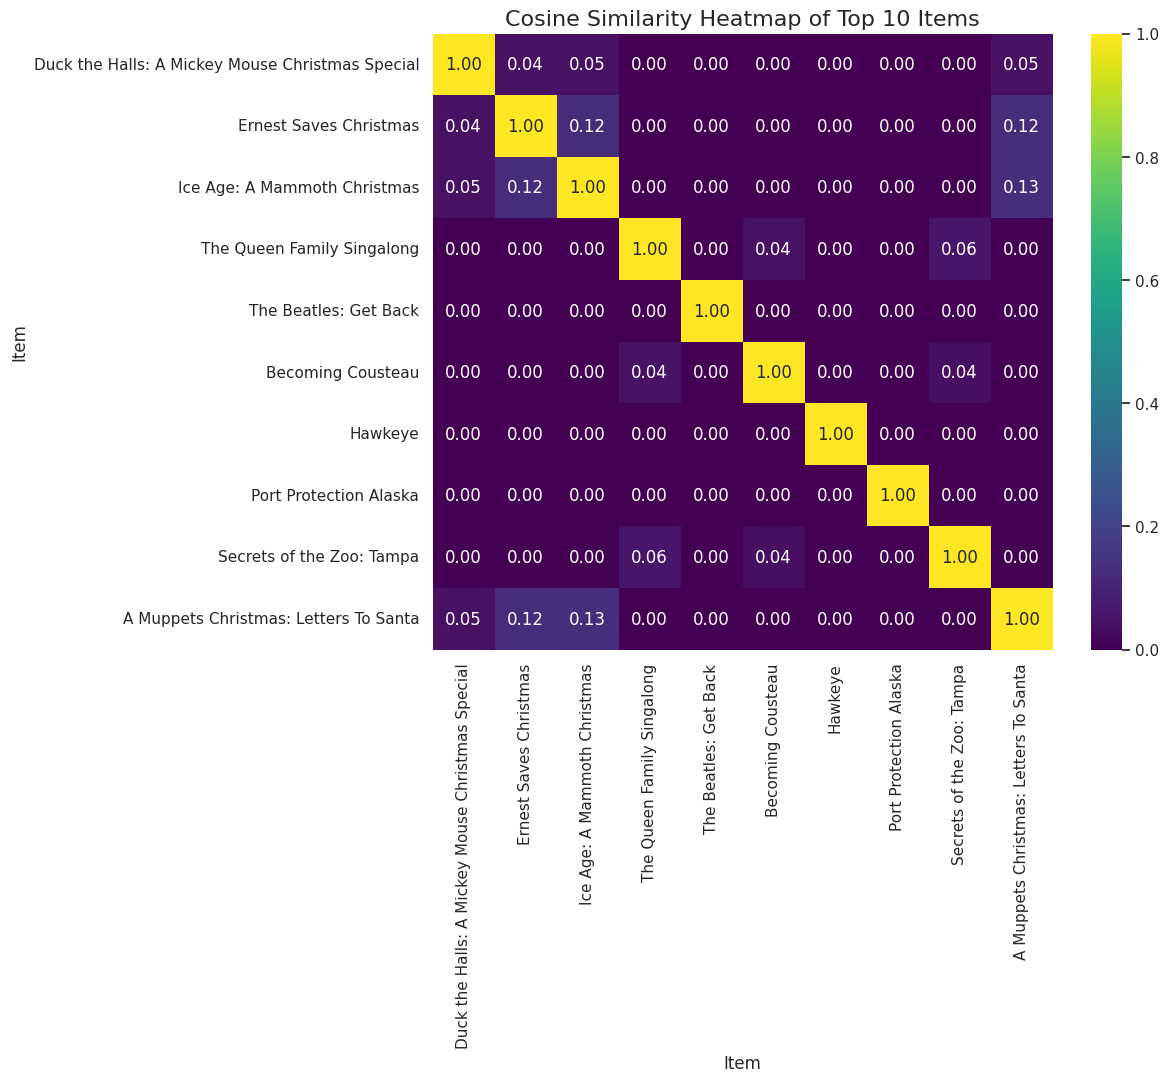

In [97]:
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim[:10, :10], annot=True, fmt='.2f', cmap='viridis', xticklabels=df['title'].head(10), yticklabels=df['title'].head(10))
plt.title('Cosine Similarity Heatmap of Top 10 Items', fontsize=16)
plt.xlabel('Item')
plt.ylabel('Item')
plt.show()

# Analyzing Disney's Focus on TV Series vs. Films in Recent Years

In this section, we will analyze the dataset to determine if Disney has been focusing more on TV series than on films in recent years.

## Prepare the Data
Extract and clean relevant information.


In [98]:
# Convert the 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract the year from the 'date_added' column
df['year_added'] = df['date_added'].dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,text,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacNeille, Bill Farmer, Russi Taylor, Corey Burton",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Duck the Halls: A Mickey Mouse Christmas Special Join Mickey and the gang as they duck the halls!,2021.0
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. Nic.,Ernest Saves Christmas Santa Claus passes his magic bag to a new St. Nic.,2021.0
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis Leary, Queen Latifah",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Ice Age: A Mammoth Christmas Sid the Sloth is on Santa's naughty list.,2021.0
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexander Jean, Fall Out Boy, Jimmie Allen",NaN,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!","The Queen Family Singalong This is real life, not just fantasy!",2021.0
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, Ringo Starr",NaN,2021-11-25,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson capturing a moment in music history with The Beatles.,The Beatles: Get Back A three-part documentary from Peter Jackson capturing a moment in music history with The Beatles.,2021.0


## Analyze the Data
Count the number of TV series and movies released each year.

In [99]:
# Group by year and type, and count the number of entries
content_by_year = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Display the content counts by year and type
content_by_year

type,Movie,TV Show
year_added,,
2019.0,630,135
2020.0,230,122
2021.0,192,138


## Visualize the Results
Plot the trends over time to compare the focus on TV series versus movies.

<Figure size 1400x800 with 0 Axes>

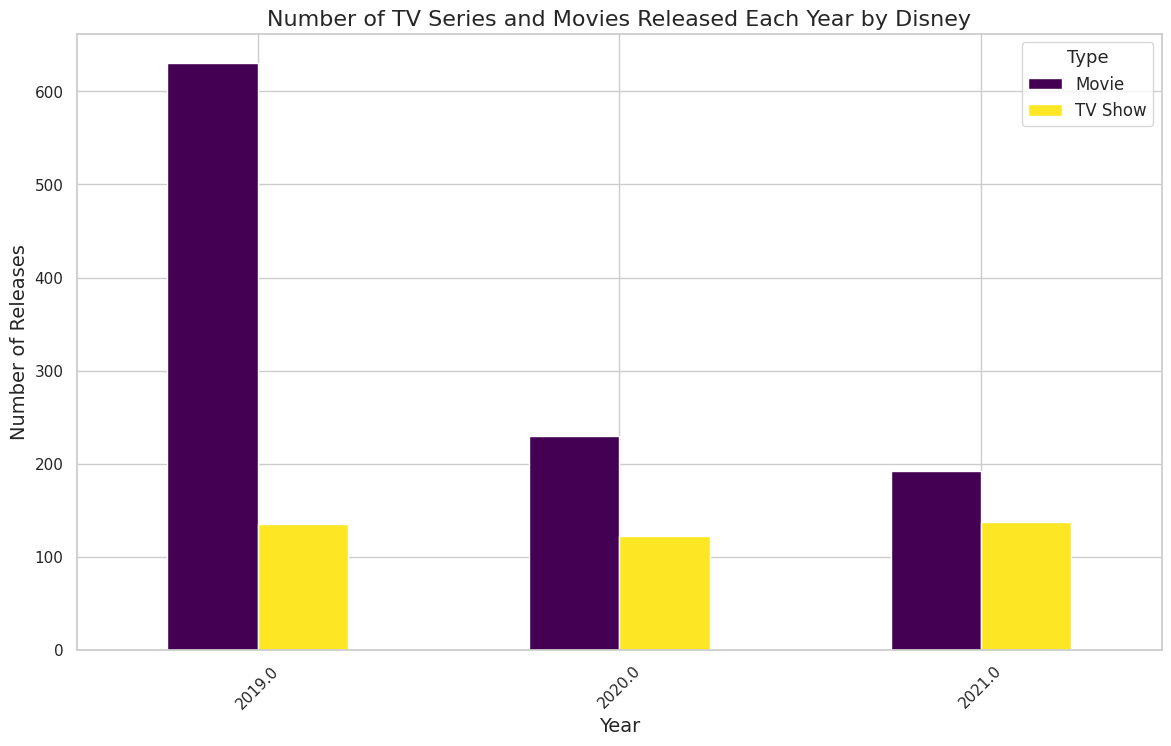

In [100]:
# Plot the number of TV series and movies released each year
plt.figure(figsize=(14, 8))
content_by_year.plot(kind='bar', stacked=False, figsize=(14, 8), colormap='viridis')
plt.title('Number of TV Series and Movies Released Each Year by Disney', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Releases', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Type', title_fontsize='13', fontsize='12')
plt.show()

# Explanation:
# Create a bar plot to visualize the number of TV series and movies released each year by Disney.
# Set the title and labels for the plot and display the plot.


Yes, Disney is **focusing** more on **TV series** than on **films** in **recent years**.

The **consistent release** of **TV series** and the **decreasing** trend in **movie releases** highlight Disney's strategic shift towards **prioritizing TV series** over films.